In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel

### REPORTE 5
*SOFIA DAGER*

*20201095*

### PARTE 1: LECTURA




En el artículo de Dancourt lo que se discute y se trata de explicar es la importancia y además decisiones del BCRP. Trata explicar las acciones del mismo durante épocas de reseción y de incertidumbre económica para el país. Hace esto a través de la presentación de gráficos, modelos económicos y explicación de distintas fórmulas que ayudan a entender el objetivo y pregunta de su artículo. 

Las principales fortalezas de este artículo, a diferencia de otros es la explicación y plasmación de un caso de la vida real. El autor no solo explica modelos o da solo ideas teóricas, sino que trata de extrapolar sus ideas a un caso práctico y que ha ya sucedido. Explica cómo son las decisiones del BCRP, y qué es lo que se toma en cuenta dependiendo el contexto del momento. Tener lo teórico también explicado en un caso de la realidad ayuda mucho a poder entender de mejor manera lo que se quiere explicar, pues está siendo aplicado. 

Por otro lado, considero una debilidad del texto que el autor no llega a explicar muy bien o a fondo los gráficos que ha decido insertar en el artículo. Para lectores con poca experiencia o conocimiento en temas macroeconómicos, puede ser difícil llegar a entender por qué y cómo es que los gráficos están complementando al texto. Sería bueno tener eso mas en consideración. También, el lenguaje y términos son un poco complicados, por lo que podría hacerse una especie de diccionario o pie de página explicando mejor los términos, ya que estos son centrales para poder entender el texto. 

A pesar de las debilidades, considero que el texto sí logra su cometido y sí llega a poder explicar las acciones del BCRP durante las reseciones y durante los años 2002-2013. Su explicación es buena y ayuda a poder entender un poco más porque las tasas de interes cambian, porqué cambian los intereses de prestamos, cantidad de préstamos, etc. 

### PARTE 2: CÓDIGO
#### PREGUNTA 1

Partiendo de la ecuación de la demanda agregada $(DA)$:

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$

Y de la ecuación de la oferta agregada $(OA)$:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

Para hallar $Y^e$ se deben igualar ambas ecuaciones:

$$ \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y = P^e + θ(Y - \bar{Y}) $$

$$ Y^e = (\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y}) : (θ - \frac{jB_1 + hk}{h}) $$

Para hallar $P^e$, hay que despejar de $OA$ en función de Y:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

$$ Y = \frac{P - P^e - θ\bar{Y}}{θ} $$

Reemplazar $Y$ en la ecuación de $DA$:

$$ P^e = (\frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}) * (\frac{P - P^e - θ\bar{Y}}{θ}) $$

Para graficar el equilibrio simultaneo entre la DA y OA

In [4]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [5]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [P_AD[0], Y[0]] # DA, coordenada inicio
B = [P_AD[-1], Y[-1]] # DA, coordenada fin

C = [P_AS[0], Y[0]] # L_45, coordenada inicio
D = [P_AS[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

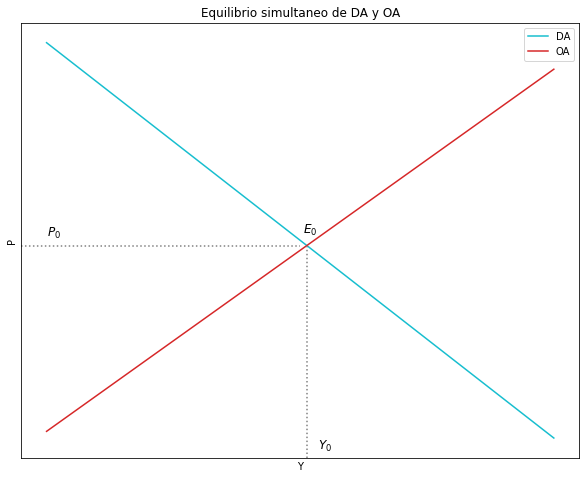

In [13]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "C9") #DA
ax.plot(Y, P_AS, label = "OA", color = "C3") #OA

# Líneas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="Equilibrio simultaneo de DA y OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

#### PREGUNTA 2

* Disminución en el gasto fiscal

* Modelo IS-LM

In [14]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)


In [18]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial de disminución en el gasto de gobierno = ", df_Y_eq_Go)


El Diferencial del Producto con respecto al diferencial de disminución en el gasto de gobierno =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [19]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial de disminución en el gasto de gobierno = ", df_r_eq_Go)

El Diferencial de la tasa de interes con respecto al diferencial de disminución en el gasto de gobierno =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


* Modelo DA-OA

In [20]:
# nombrar variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - (Pe + θ*_Y))/(θ - ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)


In [22]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del precio esperado = ", df_Y_eq_Go)

El Diferencial del Producto con respecto al diferencial del precio esperado =  j/(h*(θ - (h*r + j*(-(1 - t)*(b - m) + 1))/h))


In [23]:
df_P_eq_Go = diff(P_eq, Go)
print("El Diferencial del nivel de precios con respecto al diferencial del precio esperado = ", df_P_eq_Go)


El Diferencial del nivel de precios con respecto al diferencial del precio esperado =  j/h


* Intuición 

Con la ecuación de la DA

$$ B_0 = C_o + I_o + G_o + X_o $$

$$ B_1 = 1 - (b - m)(1 - t) $$




$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Por lo tanto:

 $$G_o ↓  → B_0 ≠ B_1$$ 
 
 ya no serán iguales y por lo tanto se altera el equilibrio

In [39]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Go = 20

# Generar la ecuación con el nuevo parámetro
def i_LM_P( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_P = i_LM_P( k, j, Ms, P, Y)

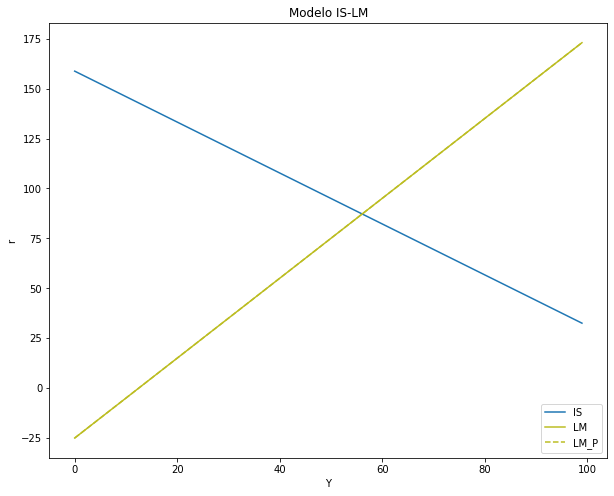

In [40]:
 # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C10") #IS
ax.plot(Y, i, label="LM", color = "C8")  #LM
ax.plot(Y, i_P, label="LM_P", color = "C8", linestyle ='dashed')  #LM_P

# Título, ejes y leyenda
ax.set(title="Modelo IS-LM", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [41]:
#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)


#--------------------------------------------------
    # NUEVA Oferta Agregada

# Definir SOLO el parámetro cambiado

Go = 35

# Generar la ecuación con el nuevo parámetro

def P_AS_Pe(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_Pe = P_AS_Pe(Pe, _Y, Y, θ)

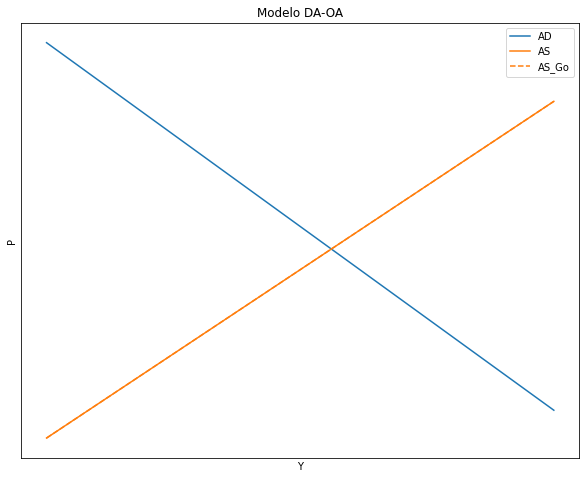

In [42]:
 # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "AD", color = "C20") #DA
ax.plot(Y, P_AS, label = "AS", color = "C1") #OA
ax.plot(Y, P_Pe, label = "AS_Go", color = "C1", linestyle = 'dashed') #OA_Pe

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="Modelo DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

* Disminución en la masa monetaria

Modelo IS-LM

In [44]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)


In [45]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)



El Diferencial del Producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [46]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de precios = ", df_r_eq_Ms)


El Diferencial de la tasa de interes con respecto al diferencial de precios =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [47]:
# nombrar variables como símbolos
h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ  = symbols('h, Ms, j, beta_0, beta_1, k, Y, Pe, _Y, θ ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (((h*Ms+j*beta_0)/h) - (Pe + θ*_Y))/(θ - ((j*beta_1+h*r)/h))
P_eq = ((h*Ms+j*beta_0)/h) - (((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ))


In [48]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)


El Diferencial del Producto con respecto al diferencial de la masa monetaria =  1/(θ - (h*r + j*(-(1 - t)*(b - m) + 1))/h)


In [49]:
df_P_eq_Ms = diff(P_eq, Ms)
print("El Diferencial del nivel de precios con respecto al diferencial del precio esperado = ", df_P_eq_Ms)


El Diferencial del nivel de precios con respecto al diferencial del precio esperado =  1


* Intuición:

Modelo IS-LM: 
$$ Ms↓ → M^s↓ → M^s < M^d → r↑ $$
$$ r↓ → I↑ → DA↑ → DA > Y → Y↑ $$

Modelo DA-OA: 
$$ Y↓ → θ(Y-\bar{Y}↓ → P↓$$


In [53]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = 100

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

In [55]:
#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Ms = 75

# Generar la ecuación con el nuevo parámetro

def P_AD_Ms(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Ms = P_AD_Ms(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

<function matplotlib.pyplot.show(close=None, block=None)>

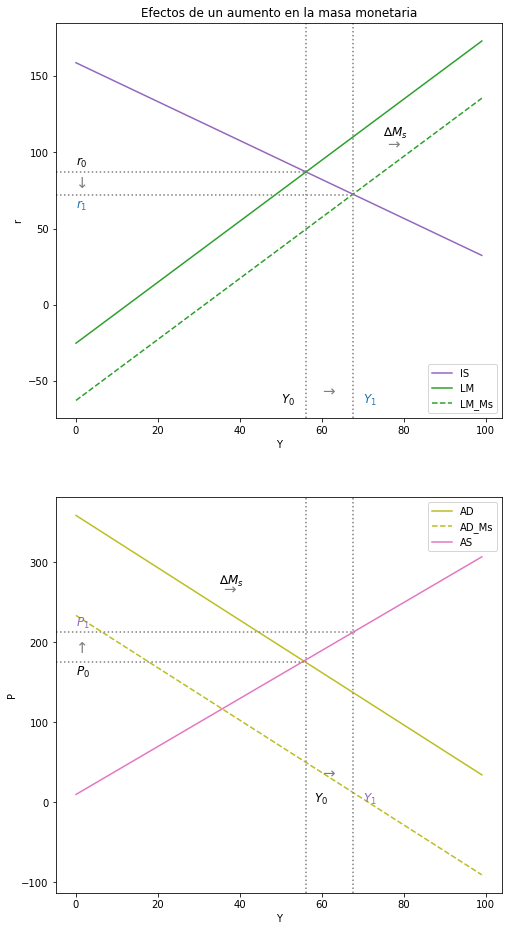

In [56]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "C4") #IS
ax1.plot(Y, i, label="LM", color = "C2")  #LM
ax1.plot(Y, i_Ms, label="LM_Ms", color = "C2", linestyle ='dashed')  #LM

ax1.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=72,  xmin= 0, xmax= 0.66, linestyle = ":", color = "grey")
ax1.axhline(y=87,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(75, 110, '∆$M_s$', fontsize=12, color='black')
ax1.text(76, 102, '→', fontsize=15, color='grey')
ax1.text(60, -60, '→', fontsize=15, color='grey')
ax1.text(0, 77, '↓', fontsize=15, color='grey')
ax1.text(50, -65, '$Y_0$', fontsize=12, color='black')
ax1.text(70, -65, '$Y_1$', fontsize=12, color='C0')
ax1.text(0, 91, '$r_0$', fontsize=12, color='black')
ax1.text(0, 63, '$r_1$', fontsize=12, color='C0')


ax1.set(title="Efectos de un aumento en la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "C8") #DA
ax2.plot(Y, P_Ms, label = "AD_Ms", color = "C8", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "C6") #OA

ax2.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=213,  xmin= 0, xmax= 0.67, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(60, 30, '→', fontsize=15, color='grey')
ax2.text(36, 260, '→', fontsize=15, color='grey')
ax2.text(35, 272, '∆$M_s$', fontsize=12, color='black')
ax2.text(0, 187, '↑', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(70, 0, '$Y_1$', fontsize=12, color='C4')
ax2.text(0, 158, '$P_0$', fontsize=12, color='black')
ax2.text(0, 220, '$P_1$', fontsize=12, color='C4')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show

* Incremento en la tasa de impuestos

Modelo IS-LM

In [57]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)


In [62]:
df_Y_eq_t = diff(Y_eq, t)
print("El Diferencial del Producto con respecto al diferencial de la tasa de interés = ", df_Y_eq_t)



El Diferencial del Producto con respecto al diferencial de la tasa de interés =  Ms*j*(b - m)*(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - Ms*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))) - j*k*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


In [63]:
df_r_eq_t = diff(r_eq, t)
print("El Diferencial de la tasa de interes con respecto al diferencial de la tasa de interés = ", df_r_eq_t)


El Diferencial de la tasa de interes con respecto al diferencial de la tasa de interés =  -Ms*h*j*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


In [64]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
t = 0.95

# Generar la ecuación con el nuevo parámetro
def i_LM_P( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_P = i_LM_P( k, j, Ms, P, Y)

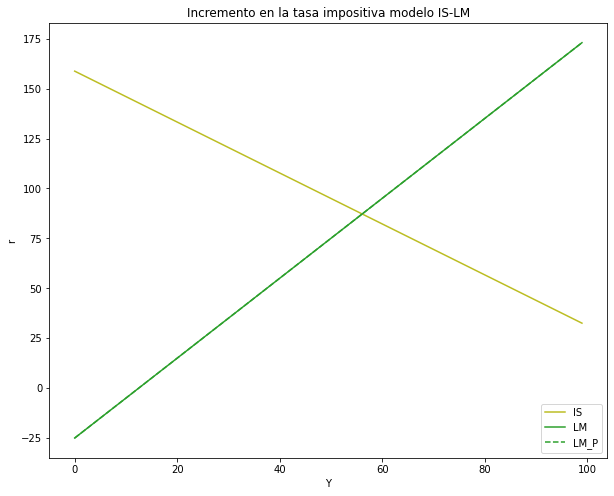

In [71]:
# Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C8") #IS
ax.plot(Y, i, label="LM", color = "C2")  #LM
ax.plot(Y, i_P, label="LM_P", color = "C2", linestyle ='dashed')  #LM_P

# Título, ejes y leyenda
ax.set(title="Incremento en la tasa impositiva modelo IS-LM", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [67]:
#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)


#--------------------------------------------------
    # NUEVA Oferta Agregada

# Definir SOLO el parámetro cambiado

t = 0.95

# Generar la ecuación con el nuevo parámetro

def P_AS_Pe(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_Pe = P_AS_Pe(Pe, _Y, Y, θ)

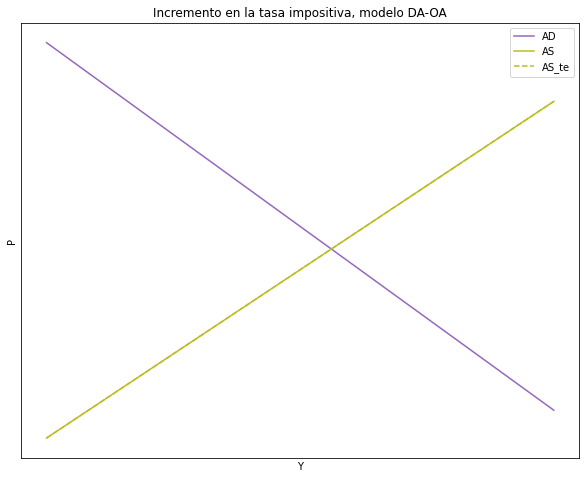

In [70]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax.plot(Y, P_Pe, label = "AS_te", color = "C8", linestyle = 'dashed') #OA_Pe

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="Incremento en la tasa impositiva, modelo DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()